<a href="https://colab.research.google.com/github/ManuelAlejandrG/Python/blob/master/Binary_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# Binary Clasification

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 1s 0us/step


In [3]:

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [4]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# Our Model

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import losses, metrics, optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.4995 - binary_accuracy: 0.7835 - val_loss: 0.3817 - val_binary_accuracy: 0.8628
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2943 - binary_accuracy: 0.9077 - val_loss: 0.3047 - val_binary_accuracy: 0.8853
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2197 - binary_accuracy: 0.9302 - val_loss: 0.2766 - val_binary_accuracy: 0.8905
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1683 - binary_accuracy: 0.9460 - val_loss: 0.2751 - val_binary_accuracy: 0.8898
Epoch 5/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1393 - binary_accuracy: 0.9546 - val_loss: 0.2843 - val_binary_accuracy: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1145 - binary_accuracy: 0.9659 - val_loss: 0.2954 - val_bina

In [24]:

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

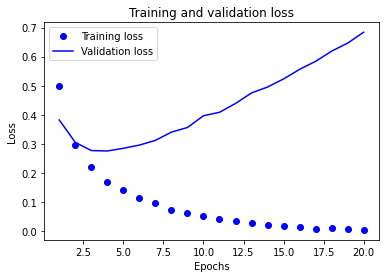

In [25]:

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

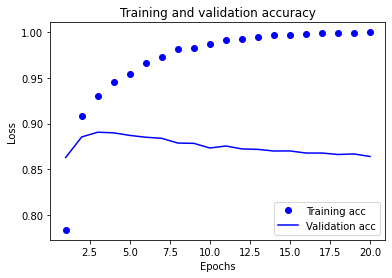

In [26]:
plt.clf()   # clear figure


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can observe only 4 epochs is enough to train model.

In [27]:
# Retrain model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.4592 - accuracy: 0.8254
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2673 - accuracy: 0.9072
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2064 - accuracy: 0.9288
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step


In [28]:
results

[0.28827894666671755, 0.8855999708175659]

In [29]:
model.predict(x_test)

array([[0.24016741],
       [0.99993324],
       [0.7960652 ],
       ...,
       [0.15287906],
       [0.06809703],
       [0.5973544 ]], dtype=float32)